In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
ev_sales = pd.read_csv('electric_vehicle_sales_by_state.csv')

In [5]:
line_break = ('==================================================================================================================')
col = ev_sales.columns
colors = ['lightcoral', 'lightblue', 'lightgreen', 'peachpuff', 'lavender', 'mintcream', 'palegoldenrod', 'thistle', 'lightyellow', 'skyblue', 'lightpink', 'honeydew', 'lavenderblush']


### General Overview


# 1. **Summary Statistics**: Generate descriptive statistics (mean, median, mode, min, max) for 'electric_vehicles_sold' and 'total_vehicles_sold'.


In [8]:
ev_sales.describe()

,electric_vehicles_sold,total_vehicles_sold
count,2445.000000,2445.000000
mean,845.035174,23402.966053
std,2185.167744,38353.266389
min,0.000000,1.000000
25%,2.000000,1158.000000
50%,54.000000,6098.000000
75%,534.000000,29396.000000
max,26668.000000,387983.000000


## 2. **Data Types Check**: Verify the data types of each column to ensure they are appropriate for analysis.


In [10]:
print(ev_sales.dtypes)

print(ev_sales['date'].head(1))
print(line_break)
ev_sales['date'] = pd.to_datetime(ev_sales['date'], format='%d-%b-%y')

print(ev_sales['date'].head(1))
print(line_break)
print(ev_sales.dtypes)

date                      object
state                     object
vehicle_category          object
electric_vehicles_sold     int64
total_vehicles_sold        int64
dtype: object
0    01-Apr-21
Name: date, dtype: object
0   2021-04-01
Name: date, dtype: datetime64[ns]
date                      datetime64[ns]
state                             object
vehicle_category                  object
electric_vehicles_sold             int64
total_vehicles_sold                int64
dtype: object


## 3. **Missing Values**: Check for and visualize missing values in the dataset.


In [12]:
ev_sales.isna().sum()

date                      0
state                     0
vehicle_category          0
electric_vehicles_sold    0
total_vehicles_sold       0
dtype: int64

## 4. **Data Shape**: Get the number of rows and columns in the dataset.


In [14]:
ev_sales.shape

(2445, 5)

# Time Series Analysis

## 5. **Sales Over Time**: Plot total vehicles sold over time (monthly, quarterly, yearly).


In [17]:
# SET DATE AS INDEX 

ev_sales.set_index('date', inplace=True)

ev_sales.columns


Index(['state', 'vehicle_category', 'electric_vehicles_sold',
       'total_vehicles_sold'],
      dtype='object')

In [18]:


monthly_sales = ev_sales.resample('ME')['total_vehicles_sold'].sum().sort_index()


monthly_sales


date
2021-04-30    1181071
2021-05-31     550599
2021-06-30    1278728
2021-07-31    1573614
2021-08-31    1377379
2021-09-30    1284310
2021-10-31    1381146
2021-11-30    1858739
2021-12-31    1565584
2022-01-31    1431350
2022-02-28    1363169
2022-03-31    1576135
2022-04-30    1609851
2022-05-31    1649537
2022-06-30    1506218
2022-07-31    1405223
2022-08-31    1472976
2022-09-30    1354721
2022-10-31    2081368
2022-11-30    2160776
2022-12-31    1419232
2023-01-31    1613238
2023-02-28    1561033
2023-03-31    1787006
2023-04-30    1517354
2023-05-31    1797164
2023-06-30    1602393
2023-07-31    1504492
2023-08-31    1566186
2023-09-30    1635630
2023-10-31    1854395
2023-11-30    2604636
2023-12-31    1738528
2024-01-31    1829015
2024-02-29    1760243
2024-03-31    1767213
Freq: ME, Name: total_vehicles_sold, dtype: int64

In [19]:
quarterly_sales  = ev_sales.resample('QE')['total_vehicles_sold'].sum().sort_index()
quarterly_sales



date
2021-06-30    3010398
2021-09-30    4235303
2021-12-31    4805469
2022-03-31    4370654
2022-06-30    4765606
2022-09-30    4232920
2022-12-31    5661376
2023-03-31    4961277
2023-06-30    4916911
2023-09-30    4706308
2023-12-31    6197559
2024-03-31    5356471
Freq: QE-DEC, Name: total_vehicles_sold, dtype: int64

In [20]:
yearly_sales   = ev_sales.resample('YE')['total_vehicles_sold'].sum().sort_index()


## 6. **Electric Vehicle Trends**: Plot the trend of electric vehicles sold over time.


<Axes: xlabel='date'>

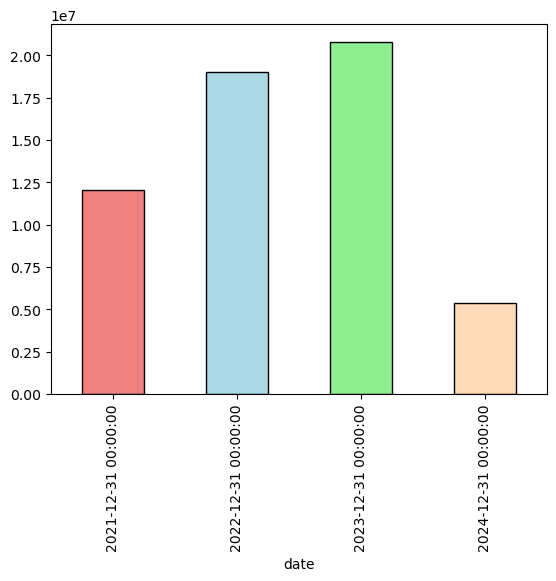

In [22]:

yearly_sales.plot(kind='bar', color = colors, edgecolor = 'black')

## 7. **Seasonality**: Analyze if there's a seasonal pattern in vehicle sales.


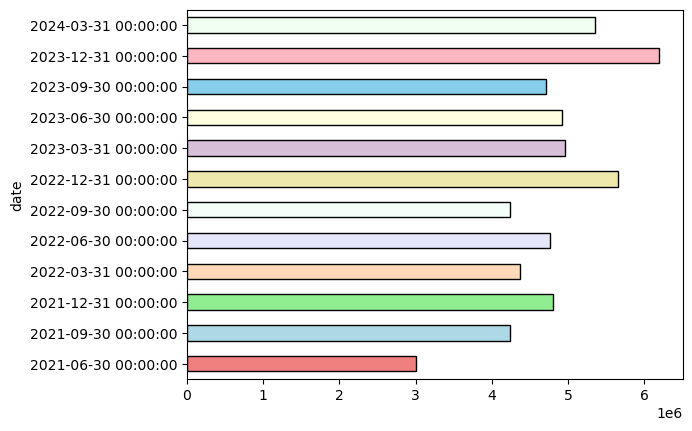

In [24]:
quarterly_sales.plot(kind='barh', color = colors, edgecolor = 'black')

plt.show()


##  8. **Yearly Comparison**: Compare sales year over year.


<Axes: ylabel='date'>

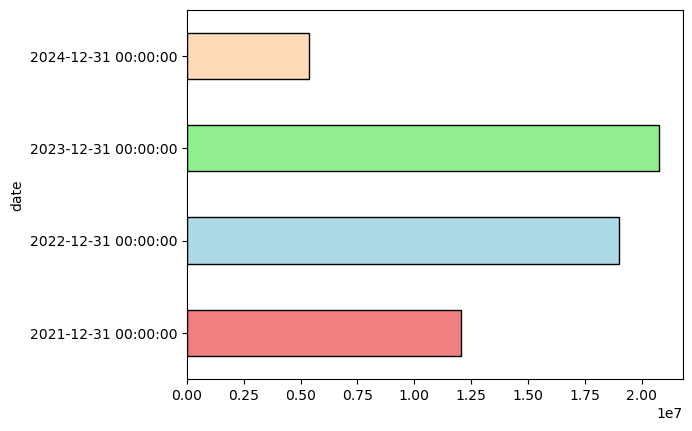

In [26]:

yearly_sales.plot(kind='barh', color = colors, edgecolor = 'black')

## 9. **Monthly Trends**: Visualize sales by month across years.

In [28]:
ev_sales.reset_index(inplace=True)
ev_sales.index

RangeIndex(start=0, stop=2445, step=1)

In [29]:
ev_sales['year']=ev_sales['date'].dt.year

ev_sales['month']= ev_sales['date'].dt.month

ev_sales.columns

Index(['date', 'state', 'vehicle_category', 'electric_vehicles_sold',
       'total_vehicles_sold', 'year', 'month'],
      dtype='object')

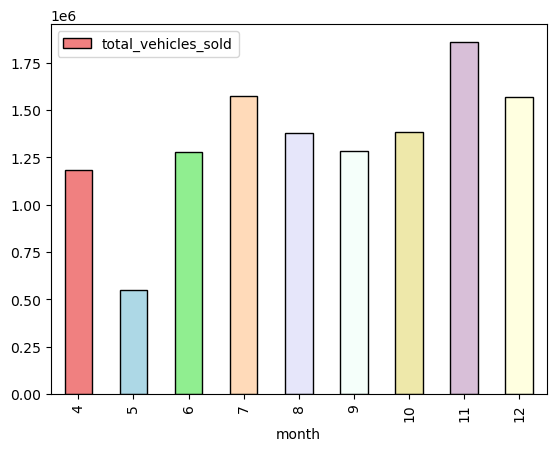

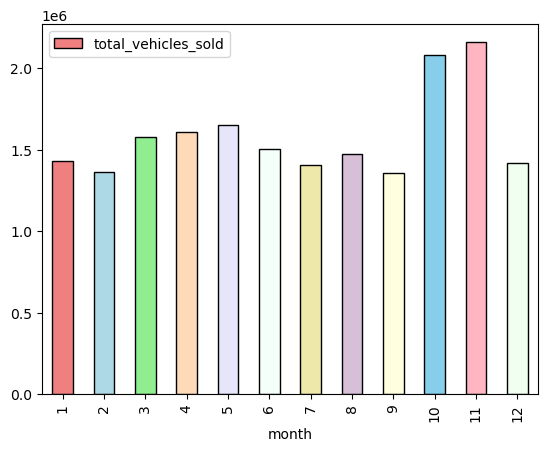

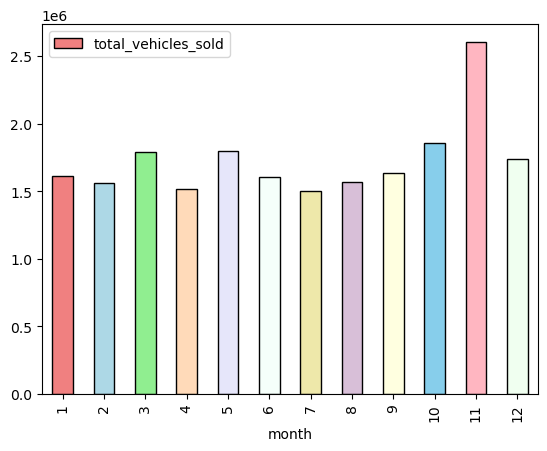

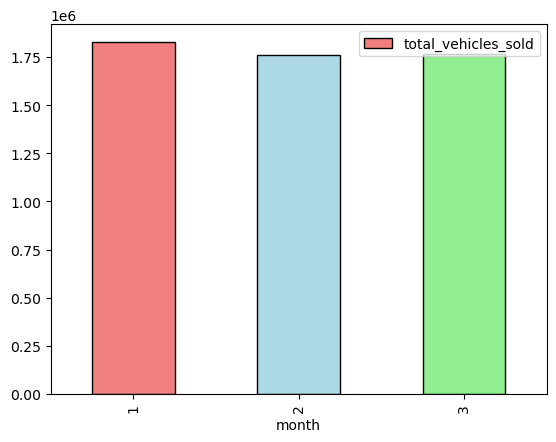

In [30]:

a = ev_sales[['year', 'month', 'total_vehicles_sold']].groupby(['year', 'month']).sum().reset_index()

a[a['year'] == 2021].plot(kind='bar', x = 'month' , y ='total_vehicles_sold',color=colors, edgecolor='black')

a[a['year'] == 2022].plot(kind='bar', x = 'month' , y ='total_vehicles_sold',color=colors, edgecolor='black')

a[a['year'] == 2023].plot(kind='bar', x = 'month' , y ='total_vehicles_sold',color=colors, edgecolor='black')
a[a['year'] == 2024].plot(kind='bar', x = 'month' , y ='total_vehicles_sold',color=colors, edgecolor='black')

plt.show()


### Geographic Analysis

## 10. **State-wise Sales**: Create a bar chart of total vehicles sold by state.
## 12. **Heatmap of Sales**: Generate a heatmap showing sales distribution across states.


Index(['date', 'state', 'vehicle_category', 'electric_vehicles_sold',
       'total_vehicles_sold', 'year', 'month'],
      dtype='object')


<Axes: xlabel='state'>

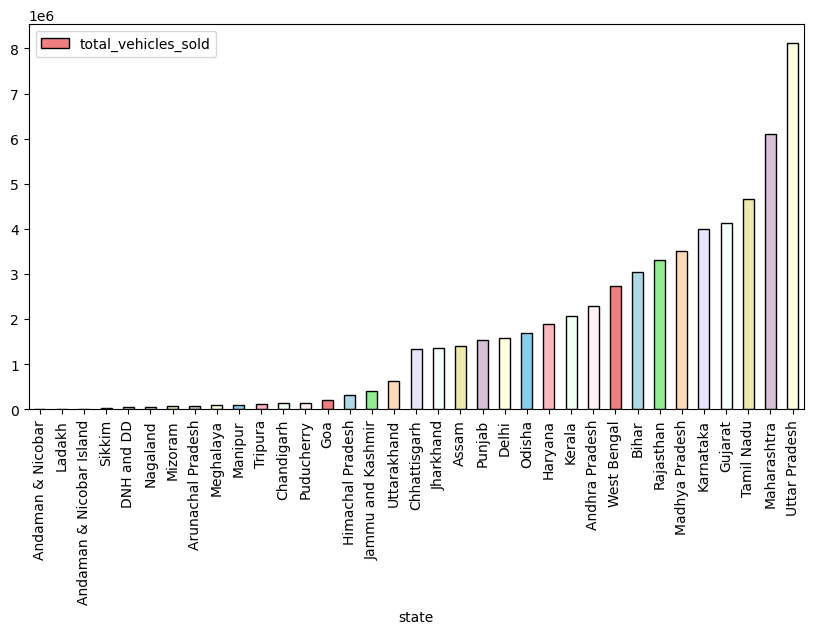

In [33]:
print(ev_sales.columns)
print(line_break)

state = ev_sales[['state','total_vehicles_sold']].groupby('state').sum('total_vehicles_sold').sort_values('total_vehicles_sold')

state.reset_index(inplace=True)

state.plot(kind='bar',x ='state', y = 'total_vehicles_sold',color=colors,edgecolor ='black',figsize=(10,5))




### Vehicle Category Analysis

## 13. **Category Breakdown**: Analyze the distribution of vehicle categories.


Index(['date', 'state', 'vehicle_category', 'electric_vehicles_sold',
       'total_vehicles_sold', 'year', 'month'],
      dtype='object')
   year vehicle_category  total_vehicles_sold
0  2021       2-Wheelers              9956997
1  2021       4-Wheelers              2094173
2  2022       2-Wheelers             15576845
3  2022       4-Wheelers              3453711
4  2023       2-Wheelers             17029004
5  2023       4-Wheelers              3753051
6  2024       2-Wheelers              4355922
7  2024       4-Wheelers              1000549
   year vehicle_category  total_vehicles_sold         Type_year
0  2021       2-Wheelers              9956997  2021(2-Wheelers)
1  2021       4-Wheelers              2094173  2021(4-Wheelers)
2  2022       2-Wheelers             15576845  2022(2-Wheelers)
3  2022       4-Wheelers              3453711  2022(4-Wheelers)
4  2023       2-Wheelers             17029004  2023(2-Wheelers)
5  2023       4-Wheelers              3753051  2023(4-Wheelers

<Axes: xlabel='Type_year'>

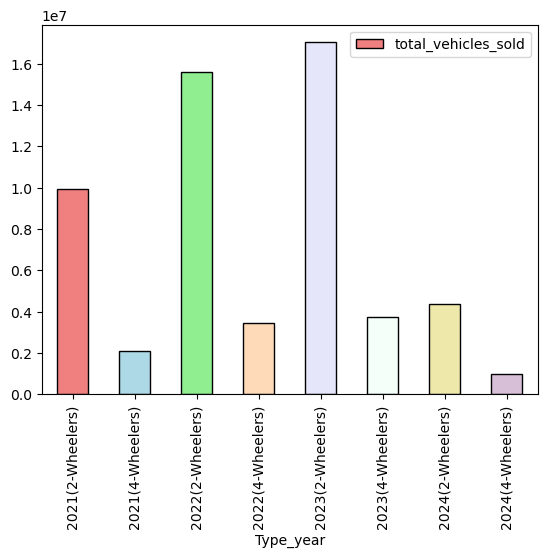

In [36]:
print(ev_sales.columns)

grouped_sales = ev_sales[['year', 'vehicle_category', 'total_vehicles_sold']].groupby(['year', 'vehicle_category']).sum().reset_index()

print(grouped_sales)

grouped_sales['Type_year'] = grouped_sales['year'].astype(str)+'('+ grouped_sales['vehicle_category'] + ')'

print(grouped_sales)
grouped_sales.plot(kind='bar', x='Type_year', y='total_vehicles_sold', color=colors, edgecolor='black')


## 14. **Sales by Vehicle Category**: Visualize total vehicles sold by vehicle category.


Index(['date', 'state', 'vehicle_category', 'electric_vehicles_sold',
       'total_vehicles_sold', 'year', 'month'],
      dtype='object')


<Axes: ylabel='total_vehicles_sold'>

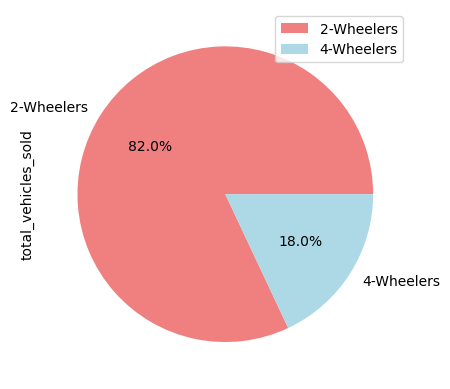

In [38]:
print(ev_sales.columns)
ev_sales[['vehicle_category','total_vehicles_sold']].groupby('vehicle_category').sum('total_vehicles_sold').plot(kind='pie',y ='total_vehicles_sold', colors=colors,autopct='%1.1f%%' )